# Kurver (MIP 12.6)

I dette avsnittet jobber vi med $\mathbb{R}^n$ der $n$ er et positivt
heltall. Nesten alle eksemplene er i $\mathbb{R}^2$ eller
$\mathbb{R}^3$.

At $\mathbf{y} \in \mathbb{R}^n$ betyr at $\mathbf{y}$ er en (kolonne)
vektor i $\mathbb{R}^n$. Det vil si at $\mathbf{y}$ er en liste med $n$
reelle tall på formen
$$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}.$$
Vi kaller $y_i$ for *komponentene* til $\mathbf{y}$. Hvis vi vil tenke
på $\mathbf{y}$ som en retning skriver vi $\vec{\mathbf{y}}$ i stedet
for $\mathbf{y}$.

**Definisjon 1**. En *parametrisert kurve* i $\mathbb{R}^n$ er en
funksjon $\mathbf{y}: I \to
  \mathbb{R}^n$ hvor $I$ er et intervall i $\mathbb{R}$.

At $\mathbf{y}$ er en parametrisert kurve betyr at for hver $t \in I$
har vi en punkt $\mathbf{y}(t) \in \mathbb{R}^n$ som vi kan skrive på
formen
$$\mathbf{y}(t) = \begin{bmatrix} y_1(t) \\ y_2(t) \\ \vdots \\ y_n(t) \end{bmatrix}.$$

**Eksempel 2**. Løsningene vi fant til systemer av differensialligninger
er eksempler på parametriserte kurver.

**Definisjon 3**. En parametrisert kurve
$\mathbf{y}: I \to \mathbb   {R}^n$ er *deriverbar* dersom alle
komponentene $y_i(t)$ er deriverbare funksjoner av $t$. Den deriverte av
$\mathbf{y}$ er den parametriserte kurven
$$\frac{d \mathbf{y}}{dt}(t) = \begin{bmatrix} y_1'(t) \\ y_2'(t) \\ \vdots \\ y_n'(t) \end{bmatrix}.$$
Vi kaller $\frac{d \mathbf{y}}{dt}(t)$ for *hastighetsvektoren* til
kurven $\mathbf{y}$ ved tid $t$.

**Eksempel 4**. La $\mathbf{y}: [0, 2\pi] \to \mathbb{R}^2$ være gitt
ved $$\mathbf{y}(t) = \begin{bmatrix} \cos t \\ \sin t \end{bmatrix}.$$
Dette er en deriverbar parametrisert kurve i $\mathbb{R}^2$ som
beskriver en sirkel. Den deriverte kurven til $\mathbf{y}$ er
$$\frac{d \mathbf{y}}{dt} = \begin{bmatrix} -\sin t \\ \cos t \end{bmatrix}.$$
Bemerk at også $\frac{d \mathbf{y}}{dt}$ er en deriverbar parametrisert
kurve som beskriver en sirkel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Vi gjenbruker funksjon som tegner piler langs kurven.
def plot_arrows_along_curve(x, y, t, num_arrows=10, ax=None, zorder=None, lengde=None):
    if ax is None:
        ax = plt.gca()
    p = []
    
    for i in range(num_arrows):
        p = int(i/num_arrows*len(t)) # Equally spaced intervals
        yp = y[p]
        xp = x[p]
        dyp = y[p+1]-y[p]
        dxp = x[p+1]-x[p]
        if lengde is not None:
            dlengde = np.sqrt(dxp**2 + dyp**2)
            dyp = lengde * dyp / dlengde
            dxp = lengde * dxp / dlengde
        ax.arrow(xp, yp, dxp, dyp ,shape='full', length_includes_head=True, head_width=0.05, zorder=zorder)
    return ax

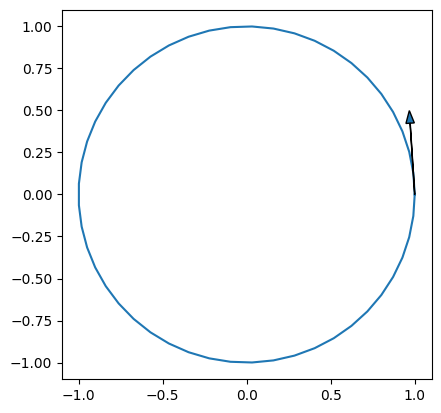

In [24]:
t = np.linspace(0, 2*np.pi)
y = np.empty((2, t.size))
y[0] = np.cos(t)
y[1] = np.sin(t)
ax = plt.gca()
ax.plot(*y, zorder=0)
plot_arrows_along_curve(*y, t, num_arrows=1, ax=None, zorder=10, lengde=0.5)
#ax.scatter(*y[:, [0]])
#ax.scatter(*y[:, [5]])
ax.set_aspect(1)

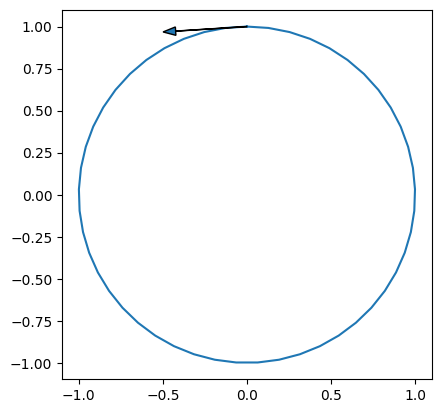

In [25]:
ymerke = np.empty((2, t.size))
ymerke[0] = -np.sin(t)
ymerke[1] = np.cos(t)
ax = plt.gca()
ax.plot(*ymerke)
plot_arrows_along_curve(*ymerke, t, num_arrows=1, ax=None, zorder=10, lengde=0.5)
ax.set_aspect(1)

**Eksempel 5**. La $\mathbf{y}: [0, 8\pi] \to \mathbb{R}^3$ være gitt ved
$$\mathbf{y}(t) = \begin{bmatrix} \cos t \\ \sin t \\ t \end{bmatrix}.$$
Dette er en parametrisert kurve i $\mathbb{R}^3$ som beskriver en
spiral.

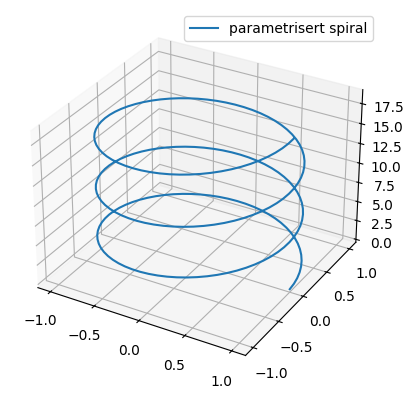

In [20]:
ax = plt.figure().add_subplot(projection='3d')
t = np.linspace(0, 6*np.pi, 200)
y = np.empty((t.size, 3))
y[:, 0] = np.cos(t)
y[:, 1] = np.sin(t)
y[:, 2] = t
ax.plot(y[:, 0], y[:, 1], y[:, 2], label='parametrisert spiral')
ax.legend();

**Eksempel 6**. La $\mathbf{p}$ være et punkt i $\mathbb{R}^n$ og la
$\vec{\mathbf{v}}$ være en vektor i $\mathbb{R}^n$. Da er
$\mathbf{y}: \mathbb{R} \to \mathbb{R}^n$ gitt ved
$$\mathbf{y}(t) = \mathbf{p} + t \vec{\mathbf{v}}$$ en parametrisert
kurve i $\mathbb{R}^n$. Denne kurven beskriver en rett linje gjennom
punktet $\mathbf{p}$ med retningsvektor $\vec{\mathbf{v}}$.

\[Illustrasjon $n=2$\]

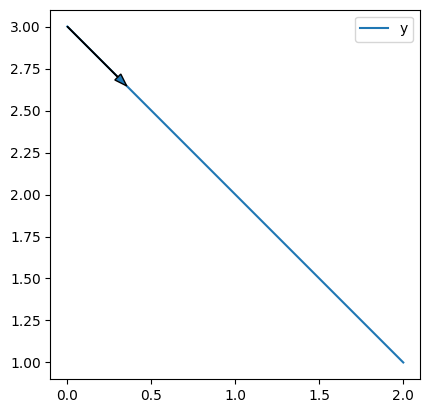

In [27]:
t = np.linspace(-1, 1, 2)
p = np.array([[1], [2]])
v = np.array([[1], [-1]])
y = p + t * v
ax = plt.gca()
ax.plot(*y, label='y')
plot_arrows_along_curve(*y, t, num_arrows=1, ax=None, zorder=10, lengde=0.5)
ax.set_aspect(1)
ax.legend();

=== Total derivasjon ===

Den [[Total derivasjon|totalderiverte]] til et generelt vektorfelt er en transformasjon som lokalt er den beste lineære tilnærmingen til funksjonen.  

En funksjon <math>f:U \to V</math>, hvor <math>U</math> er en åpen mengde i <math>\mathbb{R}^n</math> kalles ''totalt deriverbar'' eller ''totalderiverbar'' i punktet <math>x_0 \in U</math>,
hvis det finnes en lineær avbildning <math>L: \, \mathbb{R}^n \to \mathbb{R}^m</math> slik at

: <math>\lim_{h \to 0} \frac{\| f(x_{0} + h)-f(x_0) - Lh \| }{\| h\| } =0</math>.

Hvis en slik lineær avbildning <math>L</math> eksisterer, er den entydig bestemt og avhenger ikke av hvilken [[norm]] som benyttes.

For <math>n = m = 1</math> svarer den totalderiverte til den ordinære deriverte av en reell funksjon.  For et skalarfelt er <math>m = 1</math>, og den totalderiverte er lik gradienten til funksjonen.
For et vektorfelt er jacobimatrisen en representasjon av den lineære transformasjonen. 

En funksjon som er totalderiverbar i et punkt, vil være kontinuerlig i punktet.   

Hvis den totalderiverte eksisterer i et punkt, så eksisterer også alle de partiellderiverte i punktet.
Omvendt vil ''ikke'' eksistensen til samtlige partiell deriverte i et punkt <math>x_0</math> garantere at den totalt deriverte eksisterer i punktet. 
Er de partiellderiverte definert og kontinuerlige i en omegn om <math>x_0</math>, så er funksjonen totalderiverbar i <math>x_0</math>.
